/data/sq/my_project/openmmlab/mmagic/mmagic/apis/mmagic_inferencer.py:183: UserWarning: draggan's default checkpoint is overridden by ./checkpoints/stylegan2-horse_256_pytorch_mmagic.pth
  warnings.warn(


Loads checkpoint by local backend from path: ./checkpoints/stylegan2-horse_256_pytorch_mmagic.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: gen_auxiliary_losses.0.mean_path_length

missing keys in source state_dict: mean_path_length

Switch to evaluation style mode: single
Switch to evaluation style mode: single
dict_keys(['fake_img', 'noise', 'latent', 'feats'])


/data/sq/miniconda3/envs/sdfstudio/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmagic.visualization.vis_backend.VisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/data/sq/miniconda3/envs/sdfstudio/lib/python3.8/site-packages/mmcv/ops/conv2d_gradfix.py:44: UserWarning: Since aten:cudnn_convolution_backward_weight is not supported in torch==1.12.1+cu113, rolling back to `torch.nn.functional.conv2d`
  warnings.warn('Since '


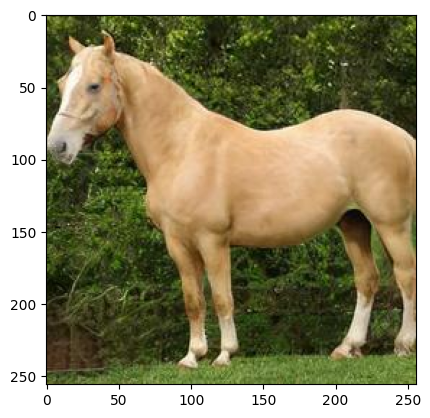

In [2]:
import matplotlib.pyplot as plt
import mmcv
import numpy as np
import torch

from mmagic.apis import MMagicInferencer

# Create a MMagicInferencer instance and infer
result_out_dir = '../my_code/tmp_res/horse.jpg'

# noise和sample_kwargs都是extra_parameters中的参数
# The code snippet you provided is creating some input parameters for the `MMagicInferencer` class.
styles = torch.from_numpy(np.random.RandomState(0).randn(1, 512)).to(
    torch.float32)
# latent = torch.load('./my_code/latent.pt')[0,0].unsqueeze(0).requires_grad_(True)
# print(latent)
# sample_kwargs = { 'truncation': 1, 'return_noise': True, 'return_features': True, 'input_is_latent': True} # 才是forward函数所输入的参数
sample_kwargs = {
    'truncation': 0.7,
    'return_noise': True,
    'return_features': True,
    'input_is_latent': False
}  # 才是forward函数所输入的参数
extra_parameters = {
    'sample_kwargs': sample_kwargs,
    'num_batches': 1,
    'noise': styles,
    'sample_model': 'ema',
    'infer_with_grad': True
}
# editor = MMagicInferencer('styleganv2', model_config='', model_ckpt=, model_name=)
editor = MMagicInferencer(
    'draggan',
    model_setting=1,
    model_ckpt='./checkpoints/stylegan2-horse_256_pytorch_mmagic.pth'
)
# basegan: extra_parameters（最特殊的参数）
results = editor.infer(
    result_out_dir=result_out_dir,
    extra_parameters=extra_parameters,
    infer_with_grad=True)
# results = editor.infer( extra_parameters=extra_parameters)
print(results[0].keys())
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
